In [66]:
import os
import os

import numpy as np
import pandas as pd
import fnmatch

We want to produce a new dataframe with one row that summarizes each summary bill file.
- text
- text_length
- party
- status
- full_encoding_length

In [67]:
parent_path = os.path.dirname(os.getcwd())
token_path = os.path.join(parent_path, "data", "tokenized")
data_explore_file = "data_explore.df"
data_explore_df = None

In [68]:
if not os.path.exists(data_explore_file):
    for root, dirs, files in os.walk(token_path):
        for f in files:
            if not fnmatch.fnmatch(f, "*shrunk*"):
                print(f)
                df = pd.read_pickle(os.path.join(root, f), compression="gzip")
                text = df["text"][0]
                text_length = len(text)
                party = df["party"][0]
                status = df["status"][0]
                encoding_length = df.shape[0]
                file_df = pd.DataFrame({"file_name": [f],
                                        "text": [text],
                                        "text_length": [text_length],
                                        "party": [party],
                                        "status": [status],
                                        "encoding_length": [encoding_length]})
                if data_explore_df is None:
                    print("initializing")
                    data_explore_df = file_df
                else:
                    print("appending")
                    data_explore_df = pd.concat([data_explore_df, file_df], ignore_index=True)
    data_explore_df.to_pickle(data_explore_file,compression="gzip")
else:
    print("loading existing file")
    data_explore_df = pd.read_pickle(data_explore_file, compression="gzip")

loading existing file


In [69]:
data_explore_df.head(5)

,file_name,text,text_length,party,status,encoding_length
0,summary_bill_1811_1392983.pkl,Establishing procedures for municipal host cus...,84,1,2,13056
1,summary_bill_1811_1392984.pkl,Relative to the referral of debts for collection.,49,1,2,9984
2,summary_bill_1811_1392985.pkl,Relative to termination of tenancy at the expi...,82,1,3,16128
3,summary_bill_1811_1392986.pkl,Relative to the justified use of deadly force ...,66,1,2,11520
4,summary_bill_1811_1392988.pkl,Relative to ratification of amendments to the ...,86,3,3,14592


In [70]:
from matplotlib import pyplot as plt

Let's look at the text lengths

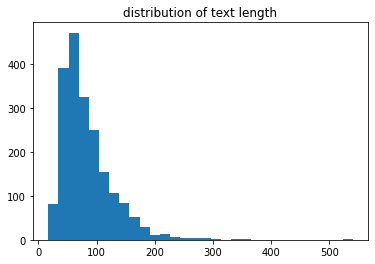

In [71]:
plt.hist(data_explore_df["text_length"], bins=30)
plt.title("distribution of text length")
plt.show()

Let's look at the distribution of party affiliation

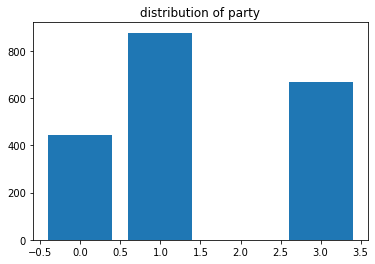

In [72]:
party_count = data_explore_df.groupby(["party"]).count()
party_count["names"] = ["Dem","Rep","Ind"]
ax = plt.subplot()
ax.bar(party_count.index, party_count["text"])
plt.title("distribution of party")
plt.show()

Look at the distribution of status values

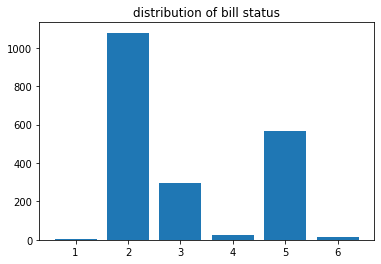

In [73]:
status_count = data_explore_df.groupby(["status"]).count()
ax_s = plt.subplot()
ax_s.bar(status_count.index, status_count["text"])
plt.title("distribution of bill status")
plt.show()

Distribution of encoding lengths

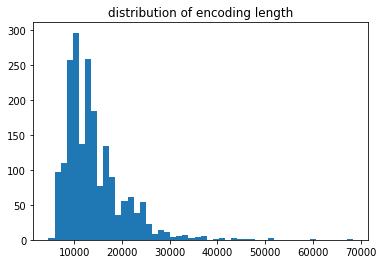

In [74]:
plt.hist(data_explore_df["encoding_length"], bins=50)
plt.title("distribution of encoding length")
plt.show()

Text length vs Encoding Length

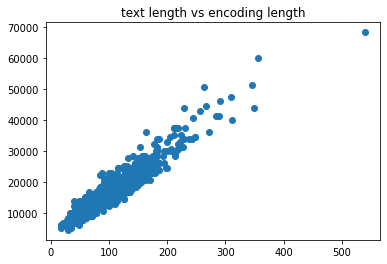

In [75]:
plt.scatter(data_explore_df["text_length"], data_explore_df["encoding_length"])
plt.title("text length vs encoding length")
plt.show()

Which file has the max text length and lets read it in

In [76]:
file_name = data_explore_df["file_name"][data_explore_df["text_length"].idxmax()]

In [77]:
max_length_file = pd.read_pickle(os.path.join(token_path, file_name), compression="gzip")

In [78]:
max_length_file["text"][0]

'Requiring certain licensing and reporting functions be conducted through the Nationwide Multistate Licensing System and Registry, relative to background investigations of trust officers, to certain filing fees, assessments, and interest rates, and to the transmission of consumer complaints by the banking department, requiring employers to provide certain workplace accommodations for employees, establishing the New Hampshire housing and conservation planning program, and relative to the collaborative care model service delivery method.'

In [79]:
len(max_length_file["text"][0])

540

party vs status

In [80]:
data_explore_df.groupby(["party","status"]).size()

party  status
0      2         334
       3          30
       5          80
       6           1
1      1           1
       2         480
       3         137
       4           9
       5         239
       6          10
3      1           1
       2         265
       3         129
       4          18
       5         249
       6           4
dtype: int64

We will look at cosine similarity between our 2048 vectors from each set of shrunk inputs. This will give a sense of how much of the inputs are similar to each other. Values near 1 or -1 would indicate very similar vectors.

In [96]:
# get an array of the shrunk tensors
import numpy as np
shrunk_array_df_path = "shrunk_array.df"
shrunk_array_df = None
if not os.path.exists(shrunk_array_df_path):
    for root, dirs, files in os.walk(token_path):
        for f in files:
            if fnmatch.fnmatch(f, "*shrunk*"):
                print(f)
                df = pd.read_pickle(os.path.join(root, f), compression="gzip")
                shrunk_encoding = np.array(df["input_shrunk"])
                file_df = pd.DataFrame({"input_shrunk": [shrunk_encoding]})
                if shrunk_array_df is None:
                    print("initializing")
                    shrunk_array_df = file_df
                else:
                    print("appending")
                    shrunk_array_df = pd.concat([shrunk_array_df, file_df], ignore_index=True)
    shrunk_array_df.to_pickle(shrunk_array_df_path,compression="gzip")
else:
    print("loading existing file")
    shrunk_array_df = pd.read_pickle(shrunk_array_df_path, compression="gzip")

summary_bill_1811_1392983-shrunk.pkl
initializing
summary_bill_1811_1392984-shrunk.pkl
appending
summary_bill_1811_1392985-shrunk.pkl
appending
summary_bill_1811_1392986-shrunk.pkl
appending
summary_bill_1811_1392988-shrunk.pkl
appending
summary_bill_1811_1392989-shrunk.pkl
appending
summary_bill_1811_1392990-shrunk.pkl
appending
summary_bill_1811_1392991-shrunk.pkl
appending
summary_bill_1811_1392992-shrunk.pkl
appending
summary_bill_1811_1392994-shrunk.pkl
appending
summary_bill_1811_1392995-shrunk.pkl
appending
summary_bill_1811_1392996-shrunk.pkl
appending
summary_bill_1811_1392997-shrunk.pkl
appending
summary_bill_1811_1393000-shrunk.pkl
appending
summary_bill_1811_1393001-shrunk.pkl
appending
summary_bill_1811_1393002-shrunk.pkl
appending
summary_bill_1811_1393003-shrunk.pkl
appending
summary_bill_1811_1393005-shrunk.pkl
appending
summary_bill_1811_1393007-shrunk.pkl
appending
summary_bill_1811_1393008-shrunk.pkl
appending
summary_bill_1811_1393009-shrunk.pkl
appending
summary_bi

In [98]:
shrunk_array_df.shape
shrunk_encodings = np.asarray([np.asarray(x) for x in shrunk_array_df["input_shrunk"]])

In [99]:
shrunk_encodings.shape

(1987, 2048)

In [100]:
from sklearn.metrics.pairwise import cosine_similarity

In [101]:
dist_matrix = cosine_similarity(shrunk_encodings)

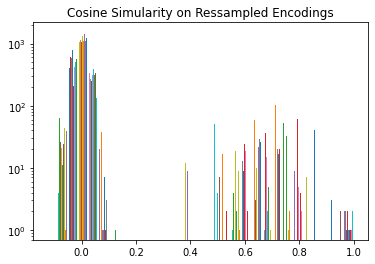

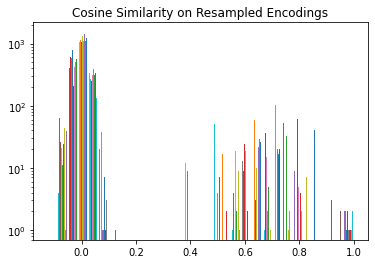

In [111]:
plt.hist(dist_matrix, bins=30)
plt.yscale('log')
plt.title("Cosine Similarity on Resampled Encodings")
plt.show()

Let's do the same for the maxpool data

In [106]:
import numpy as np
maxpool_array_df_path = "maxpool_array.df"
maxpool_array_df = None
if not os.path.exists(maxpool_array_df_path):
    for root, dirs, files in os.walk(token_path):
        for f in files:
            if fnmatch.fnmatch(f, "*maxpool*"):
                print(f)
                df = pd.read_pickle(os.path.join(root, f), compression="gzip")
                maxpool_encoding = np.array(df["input_maxpool"])
                file_df = pd.DataFrame({"input_maxpool": [maxpool_encoding]})
                if maxpool_array_df is None:
                    print("initializing")
                    maxpool_array_df = file_df
                else:
                    print("appending")
                    maxpool_array_df = pd.concat([maxpool_array_df, file_df], ignore_index=True)
    maxpool_array_df.to_pickle(shrunk_array_df_path,compression="gzip")
else:
    print("loading existing file")
    maxpool_array_df = pd.read_pickle(maxpool_array_df_path, compression="gzip")

summary_bill_1811_1392983-maxpool.pkl
initializing
summary_bill_1811_1392984-maxpool.pkl
appending
summary_bill_1811_1392985-maxpool.pkl
appending
summary_bill_1811_1392986-maxpool.pkl
appending
summary_bill_1811_1392988-maxpool.pkl
appending
summary_bill_1811_1392989-maxpool.pkl
appending
summary_bill_1811_1392990-maxpool.pkl
appending
summary_bill_1811_1392991-maxpool.pkl
appending
summary_bill_1811_1392992-maxpool.pkl
appending
summary_bill_1811_1392994-maxpool.pkl
appending
summary_bill_1811_1392995-maxpool.pkl
appending
summary_bill_1811_1392996-maxpool.pkl
appending
summary_bill_1811_1392997-maxpool.pkl
appending
summary_bill_1811_1393000-maxpool.pkl
appending
summary_bill_1811_1393001-maxpool.pkl
appending
summary_bill_1811_1393002-maxpool.pkl
appending
summary_bill_1811_1393003-maxpool.pkl
appending
summary_bill_1811_1393005-maxpool.pkl
appending
summary_bill_1811_1393007-maxpool.pkl
appending
summary_bill_1811_1393008-maxpool.pkl
appending
summary_bill_1811_1393009-maxpool.pkl

In [107]:
maxpool_encodings = np.asarray([np.asarray(x) for x in maxpool_array_df["input_maxpool"]])

In [108]:
maxpool_dist_matrix = cosine_similarity(maxpool_encodings)

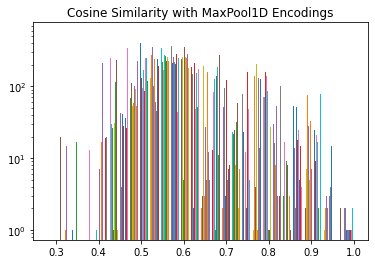

In [112]:
plt.hist(maxpool_dist_matrix, bins=30)
plt.yscale('log')
plt.title("Cosine Similarity with MaxPool1D Encodings")
plt.show()

The MaxPool1D returns a better set of differences between the encodings